In [64]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

import requests
import io
from zipfile import ZipFile
from pathlib import Path

f"Scikit-Learn version: {sklearn.__version__}"

'Scikit-Learn version: 1.6.1'

In [65]:
# mpl.style.available
mpl.style.use("seaborn-v0_8-colorblind")

In [66]:
# %%bash
# # # pip install --verbose --no-cache-dir scikit-learn
# pip install --verbose --no-cache-dir category_encoders

# Notes

### DO NOT DELETE THIS CELL ###
```

are cells used to inspect you solutions. The output from the Python code is used to grade your submissions. As you might guess from the text, we politely ask you to **not** (!!!) delete or **copy** these cells.

## [`category_encoders`](https://contrib.scikit-learn.org/category_encoders/index.html) package

You will have to download the <span style="background-color: orange">[`category_encoders`](https://contrib.scikit-learn.org/category_encoders/index.html) package</span> to work on this homework assignment. Installation instructions can be found in the [package documentation](https://contrib.scikit-learn.org/category_encoders/index.html#usage).

# Titanic dataset

* URL: https://www.openml.org/d/40945
* Detailed information on features: http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

In [67]:
from sklearn.datasets import fetch_openml

In [68]:
df, target = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="auto"
)

df = pd.concat(
    (df, target.to_frame(name="survived")),
    axis="columns",
)

df.sample(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
370,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S,12,NaN,London,1
490,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,NaN,52.0,"Southampton / New York, NY",0
713,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q,NaN,NaN,"Ireland New York, NY",0
712,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,NaN,NaN,London,0
1181,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S,NaN,NaN,NaN,0
735,3,"Coutts, Mrs. William (Winnie 'Minnie' Treanor)",female,36.0,0,2,C.A. 37671,15.9000,NaN,S,2,NaN,"England Brooklyn, NY",1
695,3,"Burns, Miss. Mary Delia",female,18.0,0,0,330963,7.8792,NaN,Q,NaN,NaN,"Co Sligo, Ireland New York, NY",0
77,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,83.1583,E52,C,NaN,NaN,"Lakewood, NJ",0
587,2,"Wells, Master. Ralph Lester",male,2.0,1,1,29103,23.0000,NaN,S,14,NaN,"Cornwall / Akron, OH",1
1106,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,NaN,NaN,NaN,0


In [69]:
def tweak(df: pd.DataFrame) -> pd.DataFrame:
    return (
        df
        .drop(
            columns=[
                "body",
                "home.dest",
            ]
        )
        .astype(
            {
                "pclass": "category",
                "cabin": "category",
                "boat": "category",
                "ticket": "category",
                "name": "category", 
            }
        )
    )


df_tweaked = tweak(df)

df_tweaked

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,0


In [70]:
df_tweaked.isna().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
boat         823
survived       0
dtype: int64

# Machine Learning

## Packages

In [71]:
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler,
    OrdinalEncoder,
    FunctionTransformer,
    TargetEncoder,
    KBinsDiscretizer,
)

from sklearn.compose import make_column_transformer
from sklearn.pipeline import (
    make_pipeline,
    make_union,
)

from sklearn.impute import SimpleImputer, MissingIndicator

from sklearn.metrics import (
    roc_auc_score,
    RocCurveDisplay,
)

from sklearn.model_selection import (
    cross_validate,
    StratifiedKFold,
    train_test_split,
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    HistGradientBoostingClassifier,
)

import lightgbm as lgbm
import category_encoders as ce

## Helper functions

In [72]:
def run_cv(estimator, X, y, cv):
    return cross_validate(
        estimator=estimator,
        X=X,
        y=y,
        cv=cv,
        scoring=("roc_auc", "accuracy",),
        return_estimator=True,
        return_indices=True,
        return_train_score=True,
        verbose=2,
    )

# https://scikit-learn.org/stable/modules/model_evaluation.html
def print_test_scores(cv_results, scorings=("test_roc_auc", "test_accuracy",)):
    for score in scorings:
        print(
            f"mean {score:30s} score = {cv_results[score].mean():.5f} +/- {cv_results[score].std():.5f}"
        )

def make_barplot_from_cv_results(
    *cv_results, ax=None, metric="test_roc_auc", show_scores=True
):
    df = pd.DataFrame(
        {name: cv_res[metric] for name, cv_res in cv_results}
    ).reset_index(names="estimator")
    ax = sns.barplot(
        pd.melt(
            df,
            value_vars=list(name for name, _ in cv_results),
            var_name="estimator",
            value_name="mean",
        ),
        x="estimator",
        y="mean",
        estimator="mean",
        errorbar="sd",
        ax=ax,
    )
    if show_scores:
        ax.bar_label(ax.containers[0], fontsize=10)
    ax.set_title(metric)

## Train-test split

In [73]:
(
    df_train,
    df_test,
    y_train,
    y_test,
) = train_test_split(
    df_tweaked.drop(columns=["survived", "boat"]),
    df_tweaked["survived"].astype(int),
    test_size=0.20,
    random_state=42,
    stratify=df_tweaked["survived"].astype(int),
)

(
    df_train.shape,
    df_test.shape,
    y_train.shape,
    y_test.shape,
)

((1047, 10), (262, 10), (1047,), (262,))

In [74]:
df_train.sample(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
946,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
489,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
363,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
776,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [75]:
def remove_columns(columns, *columns_to_drop):
    from functools import reduce
    from itertools import chain

    # return tuple(set(columns) - set(columns_to_drop))
    return tuple(reduce(lambda x, y: set(x) - set(y), columns_to_drop, columns))

cat_features = df_train.dtypes.loc[lambda s: s == "category"].index.to_list()
cont_features = df_train.dtypes.loc[lambda s: s != "category"].index.to_list()

cat_features, cont_features

(['pclass', 'name', 'sex', 'ticket', 'cabin', 'embarked'],
 ['age', 'sibsp', 'parch', 'fare'])

In [76]:
cv = StratifiedKFold(n_splits=5)

## Logistic Regression

### T: Baseline model [**2P**]

Set up a pipeline (i.e. data preprocessor + ML model) for a [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model.

The model's performance shall serve as a "baseline" to be compared to all upcoming trials of improving the model's performance through feature engineering.

The code further below assumes that the pipeline has the name `lr_baseline`.

In [77]:
# YOUR CODE HERE

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Define categorical and continuous features
cat_features = ['pclass', 'name', 'sex', 'ticket', 'cabin', 'embarked']
cont_features = ['age', 'sibsp', 'parch', 'fare']

# Preprocessing for categorical features: impute missing values and apply one-hot encoding
cat_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# Preprocessing for continuous features: impute missing values and scale
cont_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

# Combine preprocessors
preprocessor = make_column_transformer(
    (cat_transformer, cat_features),
    (cont_transformer, cont_features),
    remainder='passthrough'
)

# Baseline logistic regression pipeline
lr_baseline = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=42)
)

In [78]:
### DO NOT DELETE THIS CELL ###

cv_results_lr_baseline = run_cv(
    lr_baseline,
    df_train, y_train,
    cv,
)

print_test_scores(cv_results_lr_baseline)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
mean test_roc_auc                   score = 0.85820 +/- 0.01379
mean test_accuracy                  score = 0.79561 +/- 0.01397


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


### T: Adding new features [**10P**]

Write transformers to generate the following new features:

> **HINT**: A [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) will be helpful. 

* [**2P**] `family_size` as the sum of the `sibsp` and the `parch` features + 1.
    * Name of the transformer: `t_family_size`. 

In [79]:
# YOUR CODE HERE

from sklearn.preprocessing import FunctionTransformer
import pandas as pd

def compute_family_size(df):
    return pd.DataFrame(
        df['sibsp'] + df['parch'] + 1,
        columns=['family_size'],
        index=df.index
    )

t_family_size = FunctionTransformer(compute_family_size)

* [**2P**] Replace the content of the `name` feature with entries just containing the a person's title derived from their name. The titles are `Miss`, `Mrs`, `Mr`, `Master`, `Rev`, `Col`, `Mlle`, `Dr`, `Ms`, `Major`, `Don`, `Countess`, `Capt`, `Dona`.
    * Name of the transformer: `t_name_to_title`.

In [80]:
# YOUR CODE HERE

from sklearn.preprocessing import FunctionTransformer
import pandas as pd

def extract_title(df):
    titles = ['Miss', 'Mrs', 'Mr', 'Master', 'Rev', 'Col', 'Mlle', 
              'Dr', 'Ms', 'Major', 'Don', 'Countess', 'Capt', 'Dona']
    # Extract title using regex
    df['name'] = df['name'].str.extract(f"({'|'.join(titles)})")
    return df[['name']].fillna('Unknown')

t_name_to_title = FunctionTransformer(extract_title)

* [**2P**] Add a new feature called `deck` that is extracted from the `cabin` feature. The decks are `Unknown` (from the NaN values), `F`, `C`, `B`, `E`, `D`, `A`, `T`, `G`; the deck is the first letter found in the entries of the `cabin` feature. You can either choose to put the NaN values into a separate category (e.g. with name `Unknown`) or to leave them as NaN values.
    * Name of the transformer: `t_deck_from_cabin`. 

In [81]:
# YOUR CODE HERE

from sklearn.preprocessing import FunctionTransformer
import pandas as pd

def extract_deck(df):
    # Extract first letter from cabin, fill NaN with 'Unknown'
    df['deck'] = df['cabin'].str[0].fillna('Unknown')
    # Ensure only valid decks are kept
    valid_decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown']
    df['deck'] = df['deck'].where(df['deck'].isin(valid_decks), 'Unknown')
    return df[['deck']]

t_deck_from_cabin = FunctionTransformer(extract_deck)

* [**2P**] Add a new feature called `surname` that is extracted from the `name` feature. 
    * Name of the transformer: `t_name_surname`. 

In [82]:
# YOUR CODE HERE

from sklearn.preprocessing import FunctionTransformer
import pandas as pd

def extract_surname(df):
    # Extract surname as the part before the comma
    df['surname'] = df['name'].str.split(',').str[0].str.strip()
    return df[['surname']]

t_name_surname = FunctionTransformer(extract_surname)

[**2P**] Copy the pipeline from the previous task (baseline model) and modify the data preprocessing part to add the new features described above to the feature matrix that is passed to the ML model.

The code below assumes that the pipeline is named `lr_new_features`.

In [83]:
# YOUR CODE HERE

# Task: Logistic Regression with New Features
# Modify the baseline pipeline to include new features: family_size, name (title), deck, and surname

from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import sklearn

# Configure scikit-learn to output DataFrames
sklearn.set_config(transform_output="pandas")

# Define custom transformers for new features
class FamilySizeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame({'family_size': X['sibsp'] + X['parch']})

class TitleTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame({'title': X['name'].str.extract(r' ([A-Za-z]+)\.')[0]})

class DeckTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame({'deck': X['cabin'].str[0].fillna('Unknown')})

class SurnameTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame({'surname': X['name'].str.split(',').str[0]})

# Define categorical and continuous features
cat_features = ['pclass', 'sex', 'ticket', 'cabin', 'embarked']
new_cat_features = ['title', 'deck', 'surname']
cont_features = ['age', 'sibsp', 'parch', 'fare']
new_cont_features = ['family_size']

# Combine original and new features in a custom transformer
class CombineFeaturesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Create new features
        family_size = X['sibsp'] + X['parch']
        title = X['name'].str.extract(r' ([A-Za-z]+)\.')[0]
        deck = X['cabin'].str[0].fillna('Unknown')
        surname = X['name'].str.split(',').str[0]
        
        # Combine original features with new ones
        result = X[cat_features + cont_features].copy()
        result['family_size'] = family_size
        result['title'] = title
        result['deck'] = deck
        result['surname'] = surname
        return result

# Preprocessing for categorical features
cat_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# Preprocessing for continuous features
cont_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

# Combine preprocessors
preprocessor = make_column_transformer(
    (cat_transformer, cat_features + new_cat_features),
    (cont_transformer, cont_features + new_cont_features),
    remainder='drop'
)

# Pipeline with new features
lr_new_features = make_pipeline(
    CombineFeaturesTransformer(),
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=42)
)

# Run cross-validation (assuming df_train, y_train, and cv are defined)
cv_results_lr_new_features = run_cv(lr_new_features, df_train, y_train, cv)
print("\nLogistic Regression with New Features:")
print_test_scores(cv_results_lr_new_features) 

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s

Logistic Regression with New Features:
mean test_roc_auc                   score = 0.87042 +/- 0.00931
mean test_accuracy                  score = 0.81947 +/- 0.01509


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [84]:
### DO NOT DELETE THIS CELL ###

(
    lr_new_features["columntransformer"]
    .fit_transform(df_train)
    .filter(like="name")
    .sample(5)
)

ValueError: A given column is not a column of the dataframe

In [85]:
### DO NOT DELETE THIS CELL ###

(
    lr_new_features["columntransformer"]
    .fit_transform(df_train)
    .filter(regex="(parch|family|sibsp)")
    .sample(5)
)

ValueError: A given column is not a column of the dataframe

In [86]:
### DO NOT DELETE THIS CELL ###

(
    lr_new_features["columntransformer"]
    .fit_transform(df_train)
    .filter(like="deck")
    .sample(5)
)

ValueError: A given column is not a column of the dataframe

In [87]:
### DO NOT DELETE THIS CELL ###

cv_results_lr_new_features = run_cv(
    lr_new_features,
    df_train, y_train,
    cv,
)

print_test_scores(cv_results_lr_new_features)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
mean test_roc_auc                   score = 0.87042 +/- 0.00931
mean test_accuracy                  score = 0.81947 +/- 0.01509


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


### T: Count / Frequency encoding [**2P**]

Copy the pipeline from the baseline model and adapt it to perform count / frequency encoding for the `ticket` and the `embarked` features.

Use the [`CountEncoder`](https://contrib.scikit-learn.org/category_encoders/count.html) provided by the [`category_encoders`](https://contrib.scikit-learn.org/category_encoders/index.html) package.

The code below assumes that the pipeline is named `lr_FE_cat`.

In [88]:
# YOUR CODE HERE

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import category_encoders as ce

# Define categorical and continuous features
cat_features = ['pclass', 'name', 'sex', 'cabin']
count_features = ['ticket', 'embarked']
cont_features = ['age', 'sibsp', 'parch', 'fare']

# Preprocessing for categorical features with one-hot encoding
cat_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# Preprocessing for count-encoded features
count_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    ce.CountEncoder()
)

# Preprocessing for continuous features
cont_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

# Combine preprocessors
preprocessor = make_column_transformer(
    (cat_transformer, cat_features),
    (count_transformer, count_features),
    (cont_transformer, cont_features),
    remainder='passthrough'
)

# Pipeline with count encoding
lr_FE_cat = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=42)
)

In [89]:
## DO NOT DELETE THIS CELL ###

cv_results_lr_FE_cat = run_cv(
    lr_FE_cat,
    df_train, y_train,
    cv,
)

print_test_scores(cv_results_lr_FE_cat)

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
mean test_roc_auc                   score = 0.83111 +/- 0.01403
mean test_accuracy                  score = 0.78223 +/- 0.02137


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


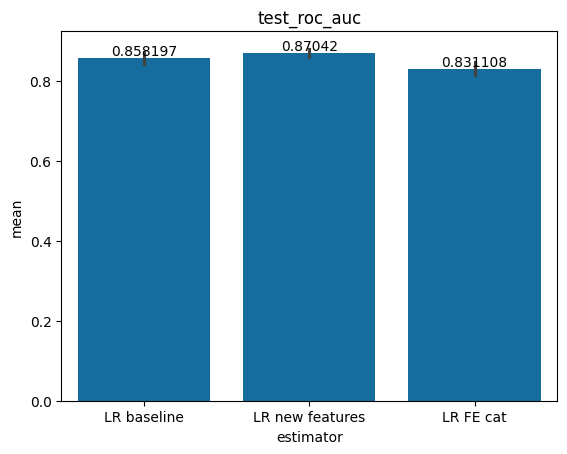

In [90]:
### DO NOT DELETE THIS CELL ###

make_barplot_from_cv_results(
    ("LR baseline", cv_results_lr_baseline),
    ("LR new features", cv_results_lr_new_features),
    ("LR FE cat", cv_results_lr_FE_cat),
)

### T: Binning [**2P**]

Discretize the continuous `age` and `fare` features to convert them to categorical features. Either use [`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) or a suitable transformer from the Scikit-Learn [`preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html) module. Use a binwidth of approx. 5y.

Copy the pipeline from the baseline model and adapt it so that the feature matrix passed to the ML model contains both features as described.

The code below assumes that the pipeline has the name `lr_binning`.

In [91]:
# YOUR CODE HERE

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Define categorical and continuous features
cat_features = ['pclass', 'name', 'sex', 'ticket', 'cabin', 'embarked']
bin_features = ['age', 'fare']
cont_features = ['sibsp', 'parch']

# Preprocessing for categorical features
cat_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# Preprocessing for binned features (age and fare)
bin_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    KBinsDiscretizer(n_bins=16, encode='ordinal', strategy='uniform')  # Approx 5y bins for age
)

# Preprocessing for continuous features
cont_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

# Combine preprocessors
preprocessor = make_column_transformer(
    (cat_transformer, cat_features),
    (bin_transformer, bin_features),
    (cont_transformer, cont_features),
    remainder='passthrough'
)

# Pipeline with binning
lr_binning = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=42)
)

In [92]:
### DO NOT DELETE THIS CELL ###

(
    lr_binning["columntransformer"]
    .fit_transform(df_train)
    .filter(like="__age")
)

,pipeline-2__age
999,5.0
392,4.0
628,2.0
1165,4.0
604,3.0
...,...
1290,9.0
1103,0.0
755,3.0
530,3.0


In [93]:
### DO NOT DELETE THIS CELL ###

(
    lr_binning["columntransformer"]
    .fit_transform(df_train)
    .filter(like="__fare")
    .sample(10)
)

,pipeline-2__fare
87,0.0
1227,0.0
1229,0.0
274,4.0
1211,0.0
519,0.0
1011,0.0
210,0.0
874,0.0
1256,0.0


In [94]:
### DO NOT DELETE THIS CELL ###

cv_results_lr_binning = run_cv(
    lr_binning,
    df_train, y_train,
    cv,
)

print_test_scores(cv_results_lr_binning)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
mean test_roc_auc                   score = 0.85762 +/- 0.01173
mean test_accuracy                  score = 0.80229 +/- 0.00885


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


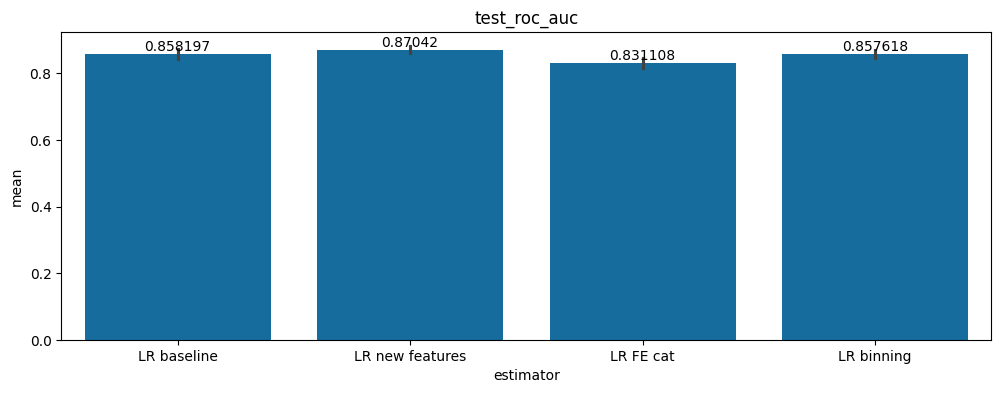

In [95]:
### DO NOT DELETE THIS CELL ###

fig, ax = plt.subplots(figsize=(12, 4))

make_barplot_from_cv_results(
    ("LR baseline", cv_results_lr_baseline),
    ("LR new features", cv_results_lr_new_features),
    ("LR FE cat", cv_results_lr_FE_cat),
    ("LR binning", cv_results_lr_binning),
    ax=ax,
)

### T: Target Encoding for `age` and `fare`  [**2P**]

Copy the pipeline from the previous task (baseline model) and modify the data preprocessing part to preform target encoding for the `age` and `fare` features.

The code below assumes that the pipeline is named `lr_TE_cont`.

In [96]:
# YOUR CODE HERE

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Define categorical and continuous features
cat_features = ['pclass', 'name', 'sex', 'ticket', 'cabin', 'embarked']
te_features = ['age', 'fare']
cont_features = ['sibsp', 'parch']

# Preprocessing for categorical features
cat_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# Preprocessing for target-encoded features
te_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    TargetEncoder(target_type='binary')
)

# Preprocessing for continuous features
cont_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

# Combine preprocessors
preprocessor = make_column_transformer(
    (cat_transformer, cat_features),
    (te_transformer, te_features),
    (cont_transformer, cont_features),
    remainder='passthrough'
)

# Pipeline with target encoding
lr_TE_cont = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=42)
)

In [97]:
### DO NOT DELETE THIS CELL ###

cv_results_lr_TE_cont = run_cv(
    lr_TE_cont,
    df_train, y_train,
    cv,
)

print_test_scores(cv_results_lr_TE_cont)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
mean test_roc_auc                   score = 0.86223 +/- 0.01917
mean test_accuracy                  score = 0.79371 +/- 0.02615


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


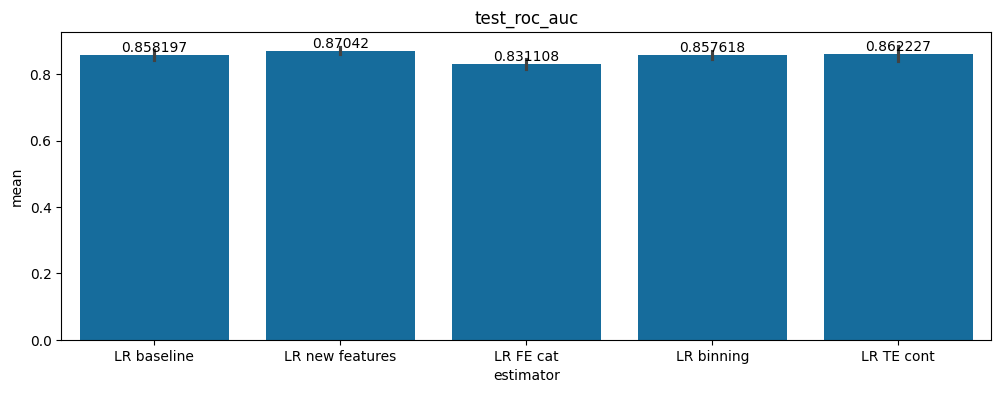

In [98]:
### DO NOT DELETE THIS CELL ###

fig, ax = plt.subplots(figsize=(12, 4))

make_barplot_from_cv_results(
    ("LR baseline", cv_results_lr_baseline),
    ("LR new features", cv_results_lr_new_features),
    ("LR FE cat", cv_results_lr_FE_cat),
    ("LR binning", cv_results_lr_binning),
    ("LR TE cont", cv_results_lr_TE_cont),
    ax=ax,
)

### T: Combine [**2P** extra credit]

Combine your most successfull approaches for feature engineering and try to boost the performance of you classifier beyond what you have achieved before. If you succeed, you will get 2P of extra credit.

The code below assumes that your pipeline is named `lr_combined`.

In [99]:
# YOUR CODE HERE

from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import category_encoders as ce

# Define feature categories
cat_features = ['pclass', 'sex', 'cabin']
count_features = ['ticket', 'embarked']
new_cat_features = ['name', 'deck', 'surname']
bin_features = ['age', 'fare']
cont_features = ['sibsp', 'parch']
new_cont_features = ['family_size']

# Preprocessing for categorical features
cat_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# Preprocessing for count-encoded features
count_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    ce.CountEncoder()
)

# Preprocessing for binned features
bin_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    KBinsDiscretizer(n_bins=16, encode='ordinal', strategy='uniform')
)

# Preprocessing for continuous features
cont_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

# Combine feature transformers
feature_union = make_union(
    t_family_size,
    t_name_to_title,
    t_deck_from_cabin,
    t_name_surname
)

# Combine preprocessors
preprocessor = make_column_transformer(
    (cat_transformer, cat_features + new_cat_features),
    (count_transformer, count_features),
    (bin_transformer, bin_features),
    (cont_transformer, cont_features + new_cont_features),
    remainder='passthrough'
)

# Combined pipeline
lr_combined = make_pipeline(
    feature_union,
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=42)
)


In [100]:
### DO NOT DELETE THIS CELL ###

cv_results_lr_combined = run_cv(
    lr_combined,
    df_train, y_train,
    cv,
)

print_test_scores(cv_results_lr_combined)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7096, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'pclass'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/_indexing.py", line 364, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/opt/homebrew/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3819, in get_loc
    raise KeyError(key) from err
KeyError: 'pclass'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/homebrew/lib/python3.9/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py", line 993, in fit_transform
    self._validate_column_callables(X)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py", line 552, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/_indexing.py", line 372, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


NameError: name 'cv_results_lr_combined' is not defined

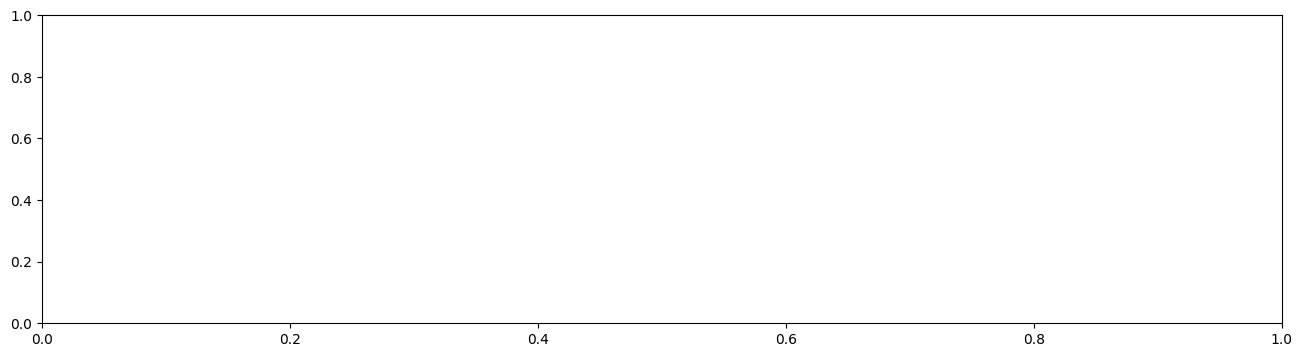

In [101]:
### DO NOT DELETE THIS CELL ###

fig, ax = plt.subplots(figsize=(16, 4))

make_barplot_from_cv_results(
    ("LR baseline", cv_results_lr_baseline),
    ("LR new features", cv_results_lr_new_features),
    ("LR FE cat", cv_results_lr_FE_cat),
    ("LR binning", cv_results_lr_binning),
    ("LR TE cont", cv_results_lr_TE_cont),
    ("LR combined", cv_results_lr_combined),
    ax=ax,
)